<h1> Segunda Práctica <h1>

En esta segunda práctica pruebo los diferentes resultados de varias regresiones lineales tanto centradas en el (0,0) como descentradas

#### Importamos las librerías necesarias para trabajar

La mas destacable es sklearn, pues es la librería con las regresiones lineales.

In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import string

#### Transformamos los datos

Los datos son los tiempos de diferentes corredores pasando por 6 puntos de control y la llegada a la meta. Como no nos interesa la hora y segundos, lo pasamos todo a minutos con una simple función que usa el método "to_datetime" de pandas para así trabajar de forma más sencilla:

In [8]:

def transform_column(x):
    x = pd.to_datetime(x)
    return (x.dt.hour * 60) + x.dt.minute

df = pd.read_csv("tiempos.csv", sep=";")

df = df.apply(lambda x: transform_column(x))
df.head()

,P1,P2,P3,P4,P5,P6,T_Final
0,172,254,356,385,514,636,703
1,163,253,371,408,556,674,738
2,188,279,389,419,580,728,803
3,195,288,397,425,579,729,800
4,195,296,415,453,619,766,863


## Primer apartado, "Linear Regression"

##### En toda regresión lineal el objetivo es encontrar el conjunto de pesos que disminuya lo máximo posible el error, y en consecuencia, este más ajustada a los datos. La fórmula del error es:



$J_w = \frac{1}{m} \sum_{i=1}^{1} (yi - yi)^2$


Primero tomamos los puntos de control como un primer conjunto de datos, y el tiempo final como otro. La intención es entrenar la regresión lineal, para que dados unos tiempos en los puntos de control, determine el tiempo final. De esta forma obtenemos un train y un test de cada conjunto enviado a la función "train_test_split" de sklearn, a la cuál le añadimos el parámetro "train_size" para que el entrenamiento se componga de un 70% de los datos y el test el 30% restante.

In [9]:
trainx, testx, trainy, testy = train_test_split(df[df.columns[0:6]],df["T_Final"], train_size = 0.7, random_state=111)

Si se asigna </b>fit_intercept=False</b> al crear el objeto de una regresion lineal, no se centran las muestras. Básicamente lo que decide este parámetro es si a los datos se les restará la media.

Comenzamos a trabajar con el modelo, primero la opción sin centrar y luego con los datos centrados. Cada caso se entrena con los datos de train, y se comprueba su error cuadrático con la función <b>mean_squared_error</b> y los conjuntos test.

In [10]:
Lr = LinearRegression(fit_intercept=False)
Lr.fit(trainx, trainy)
mean_squared_error(testy, Lr.predict(testx), squared = False)

17.17054162375292

In [11]:
Lrc = LinearRegression(fit_intercept = True)
Lrc.fit(trainx, trainy)
mean_squared_error(testy, Lrc.predict(testx), squared = False)

17.358093260810744

Como podemos comprobar, aunque los errores cuadráticos son muy similares en ambos casos, al centrar las muestras es un poco mayor, lo que indica en parte un peor ajuste.

#### A continuación imprimo los coeficientes del caso sin centrar en forma de histograma:


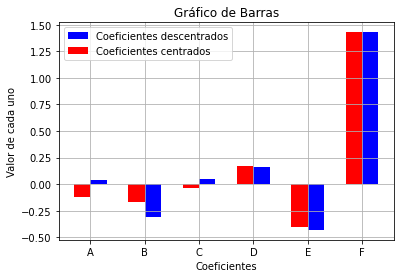

In [12]:


etiquetas = list(string.ascii_uppercase)[:6]
x = np.arange(Lr.coef_.size)
y1 = Lr.coef_.tolist()
y2 = Lrc.coef_.tolist()
ax = plt.subplot(111)
ax.bar(x, y1, width=0.3, color='blue')
ax.bar(x-0.3, y2, width=0.3, color='red')
ax.set_xlabel('Coeficientes')
ax.set_ylabel('Valor de cada uno')
ax.set_xticks(x-0.15, etiquetas)
ax.legend(['Coeficientes descentrados', 'Coeficientes centrados'])
ax.set_title('Gráfico de Barras')
ax.grid()
plt.show()


Como podemos comprobar los coeficientes son muy parecidos, probablemente porque ya de por sí las muestras son muy cercanas al 0.

### Segundo apartado, regresiones lineales con regularización

##### En estos dos casos que trataremos ahora, siguen siendo regresiones lineales que tratan de minimizar el error con combinaciones de coeficinetes, sin embargo, en su fórmula se añade una lambda que multiplica a una variante de la suma de los pesos, que a su vez se suma a la ecuación inicial.

Ahora trataremos con los modelos Ridge y Lasso, comenzando por Ridge con el mismo procedimiento. Los lambdas para las pruebas serán 1, 5 y 15. De nuevo comenzaremos primero con los datos sin centrar y luego centrados.

En Ridge, <b>lambda</b> multiplica a la suma de los pesos al cuadrado, y en Lasso a la suma de los valores absolutos de cada peso.

In [13]:
L21 = Ridge(alpha=1.0, fit_intercept=False)
L22 = Ridge(alpha=5.0, fit_intercept=False)
L23 = Ridge(alpha=15.0, fit_intercept=False)

L21.fit(trainx,trainy)
L22.fit(trainx,trainy)
L23.fit(trainx,trainy)

print(mean_squared_error(testy, L21.predict(testx), squared = False))
print(mean_squared_error(testy, L22.predict(testx), squared = False))
print(mean_squared_error(testy, L23.predict(testx), squared = False))

17.170729779587372
17.171481893879143
17.17335867352651


De nuevo, una vez hemos creado los diferentes casos sin centrar, y los hemos entrenado, procedemos a ver su herror cuadrático.
Como podemos comprobar, el error es menor, conforme más alto es <b>lambda</b> y por tanto mejor, pero no sustancialmente.

Ahora los casos centrado:

In [14]:
L21c = Ridge(alpha=1.0, fit_intercept = True)
L22c = Ridge(alpha=5.0, fit_intercept = True)
L23c = Ridge(alpha=15.0, fit_intercept = True)

L21c.fit(trainx,trainy)
L22c.fit(trainx,trainy)
L23c.fit(trainx,trainy)

print(mean_squared_error(testy, L21c.predict(testx), squared = False))
print(mean_squared_error(testy, L22c.predict(testx), squared = False))
print(mean_squared_error(testy, L23c.predict(testx), squared = False))


17.35825987341846
17.358925489192007
17.360583733201896


Mismo caso anterior, pero los errores son un poco mayores.

Para los valores 1 y 15 de <b>lambda</b>, veremos las diferencias en histogramas, tanto centrado como sin centrar:

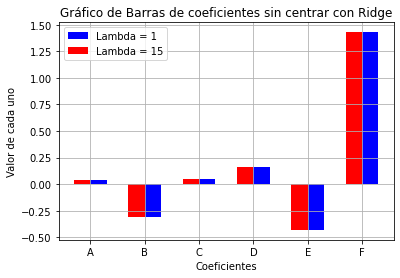

In [15]:
y1 = L21.coef_.tolist()
y2 = L23.coef_.tolist()
ax = plt.subplot(111)
ax.bar(x, y1, width=0.3, color='blue')
ax.bar(x-0.3, y2, width=0.3, color='red')
ax.set_xlabel('Coeficientes')
ax.set_ylabel('Valor de cada uno')
ax.set_xticks(x-0.15, etiquetas)
ax.legend(['Lambda = 1', 'Lambda = 15'])
ax.set_title('Gráfico de Barras de coeficientes sin centrar con Ridge')
ax.grid()
plt.show()





Ahora centrados

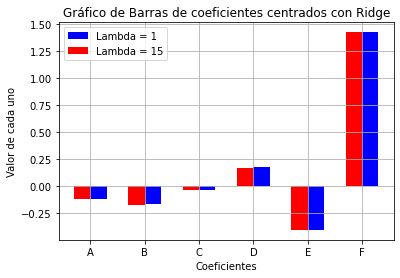

In [16]:


y1 = L21c.coef_.tolist()
y2 = L23c.coef_.tolist()
ax = plt.subplot(111)
ax.bar(x, y1, width=0.3, color='blue')
ax.bar(x-0.3, y2, width=0.3, color='red')
ax.set_xlabel('Coeficientes')
ax.set_ylabel('Valor de cada uno')
ax.set_xticks(x-0.15, etiquetas)
ax.legend(['Lambda = 1', 'Lambda = 15'])
ax.set_title('Gráfico de Barras de coeficientes centrados con Ridge')
ax.grid()
plt.show()

La principal diferencia en estos barplots, es que, como debe ser, las muestras centradas comienza con unos pesos más cercanos al 0.

### Caso de la regression Lasso

In [17]:

L11 = Lasso(alpha=1.0, fit_intercept=False)
L12 = Lasso(alpha=5.0, fit_intercept=False)
L13 = Lasso(alpha=15.0, fit_intercept=False)

L11.fit(trainx,trainy)
L12.fit(trainx,trainy)
L13.fit(trainx,trainy)

print(mean_squared_error(testy, L11.predict(testx), squared = False))
print(mean_squared_error(testy, L12.predict(testx), squared = False))
print(mean_squared_error(testy, L13.predict(testx), squared = False))

27.083230636202106
26.905297455336957
26.47480025599876


C:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.420e+04, tolerance: 1.435e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.596e+04, tolerance: 1.435e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

De nuevo conforme mayor es el lambda, menor es el error.

Ahora los casos de Lasso centrados:

In [18]:
L11c = Lasso(alpha=1.0, fit_intercept = True)
L12c = Lasso(alpha=5.0, fit_intercept = True)
L13c = Lasso(alpha=15.0, fit_intercept = True)


L11c.fit(trainx,trainy)
L12c.fit(trainx,trainy)
L13c.fit(trainx,trainy)


print(mean_squared_error(testy, L11c.predict(testx), squared = False))
print(mean_squared_error(testy, L12c.predict(testx), squared = False))
print(mean_squared_error(testy, L13c.predict(testx), squared = False))

17.431363865449534
17.510180252068317
17.583699432496147


En este caso, las centradas son considerablemente menores, y por tanto mejores, a parte, como en todos los casos anteriores a mayor lambda menor error.

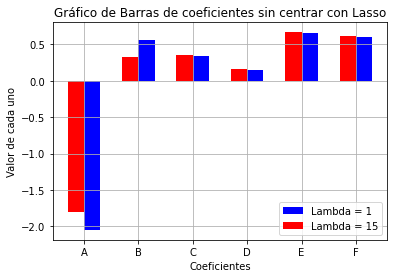

In [19]:

y1 = L11.coef_.tolist()
y2 = L13.coef_.tolist()
ax = plt.subplot(111)
ax.bar(x, y1, width=0.3, color='blue')
ax.bar(x-0.3, y2, width=0.3, color='red')
ax.set_xlabel('Coeficientes')
ax.set_ylabel('Valor de cada uno')
ax.set_xticks(x-0.15, etiquetas)
ax.legend(['Lambda = 1', 'Lambda = 15'])
ax.set_title('Gráfico de Barras de coeficientes sin centrar con Lasso')
ax.grid()
plt.show()


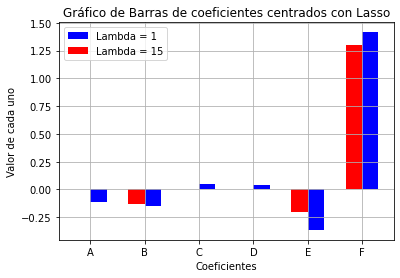

In [20]:
#plt.bar(np.arange(L13.coef_.size), height = L11c.coef_.tolist())
#plt.show()
#plt.bar(np.arange(L13.coef_.size), height = L13c.coef_.tolist())
#plt.show()

y1 = L11c.coef_.tolist()
y2 = L13c.coef_.tolist()
ax = plt.subplot(111)
ax.bar(x, y1, width=0.3, color='blue')
ax.bar(x-0.3, y2, width=0.3, color='red')
ax.set_xlabel('Coeficientes')
ax.set_ylabel('Valor de cada uno')
ax.set_xticks(x-0.15, etiquetas)
ax.legend(['Lambda = 1', 'Lambda = 15'])
ax.set_title('Gráfico de Barras de coeficientes centrados con Lasso')
ax.grid()
plt.show()